Реализовав сверточную нейронную сеть при помощи библиотеки
PyTorch, решите задачу классификации изображений (могут быть не только
изображения, а численные переменные и текст). Разделите набор данных на
обучающее и тестовое множество. Выполните предобработку данных
(приведите изображения к одному размеру и преобразуйте в тензоры).
Отобразите графики значений функции потерь на обучающем множестве.
Отобразите confusion matrix и classification report, рассчитанные на основе
тестового множества.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import pandas as pd
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
from PIL import Image
import torch

In [ ]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import cv2
from PIL import Image
from sklearn.metrics import classification_report

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from sklearn.utils import shuffle
from PIL import Image

In [ ]:
class_name=["marvel","star_wars"]
label_name={class_name: i for i, class_name in enumerate(class_name)}

In [ ]:
print(len(label_name))

2



Смотрим на случайные картинки из датасета

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

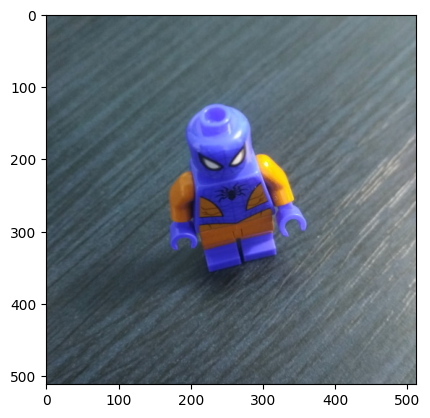

In [ ]:
image_path=cv2.imread("./marvel/0_001.jpg")
plt.imshow(image_path)
plt.show()

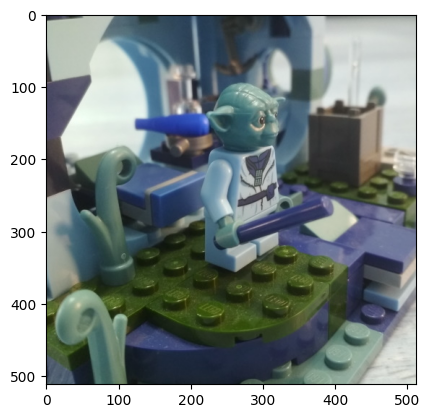

In [ ]:
image_path=cv2.imread("./star_wars/0_001.jpg")
plt.imshow(image_path)
plt.show()

In [ ]:
image_shape=(128,128)

### Загружаем датасет

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

def data_set_load():
    # Сначала создаются два списка путей к данным
    data_path = ["./marvel/", "./star_wars/"]
    # Далее создается пустой список, в который будут добавляться данные в процессе их загрузки
    image_data_train = []
    label_data_train = []
    image_data_test = []
    label_data_test = []

    for i, folder_path in enumerate(data_path):
        # создается пустой список
        image_data = []
        label_data = []
        print("Counting: {}".format(folder_path))

        for image_data_file in tqdm(os.listdir(folder_path)):
            # получаем путь к изображению
            image_path = os.path.join(folder_path, image_data_file)
            # считываем
            image = cv2.imread(image_path)
            # изображение преобразуется из цветовой модели BGR в RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            # изображение изменяется в размере
            image = cv2.resize(image, image_shape)
            # измененное изображение добавляется в список
            image_data.append(image)
            # метка класса добавляется в список
            label_data.append(i)  # Используем индекс папки как метку класса

        # Разделяем выборку на обучающую и тестовую
        X_train, X_test, y_train, y_test = train_test_split(
            image_data, label_data, test_size=0.2, random_state=42
        )

        image_data_train.extend(X_train)
        label_data_train.extend(y_train)
        image_data_test.extend(X_test)
        label_data_test.extend(y_test)

    image_data_train = np.array(image_data_train, dtype="float32")
    label_data_train = np.array(label_data_train, dtype="int32")
    image_data_test = np.array(image_data_test, dtype="float32")
    label_data_test = np.array(label_data_test, dtype="int32")

    train_data = (image_data_train, label_data_train)
    test_data = (image_data_test, label_data_test)

    return train_data, test_data


In [ ]:
data_set_load()

Counting: ./marvel/


100%|██████████| 193/193 [00:00<00:00, 219.63it/s]


Counting: ./star_wars/


100%|██████████| 139/139 [00:00<00:00, 221.51it/s]


((array([[[[  1.,   0.,   6.],
           [  1.,   0.,   6.],
           [  1.,   0.,   6.],
           ...,
           [143., 136., 169.],
           [143., 136., 169.],
           [143., 136., 169.]],
  
          [[  2.,   1.,  17.],
           [  3.,   2.,  18.],
           [  4.,   1.,  18.],
           ...,
           [143., 136., 169.],
           [143., 136., 169.],
           [143., 136., 169.]],
  
          [[ 17.,  18.,  40.],
           [ 19.,  18.,  43.],
           [ 19.,  15.,  40.],
           ...,
           [143., 136., 169.],
           [143., 136., 169.],
           [144., 134., 168.]],
  
          ...,
  
          [[137., 136., 168.],
           [137., 136., 168.],
           [137., 138., 169.],
           ...,
           [136., 135., 167.],
           [134., 133., 165.],
           [132., 131., 163.]],
  
          [[138., 136., 168.],
           [139., 136., 168.],
           [139., 135., 168.],
           ...,
           [136., 135., 167.],
           [130., 

In [ ]:
(X_train,Y_train),(X_test,Y_test)=data_set_load()

Counting: ./marvel/


100%|██████████| 193/193 [00:00<00:00, 242.05it/s]


Counting: ./star_wars/


100%|██████████| 139/139 [00:00<00:00, 230.90it/s]


In [ ]:
_,train_image_label_info=np.unique(Y_train,return_counts=True)
_,test_image_label_info=np.unique(Y_test,return_counts=True)

In [ ]:
print("Train image label information for 0 class  :",train_image_label_info[0])
print("Train image label information for 1 class  :",train_image_label_info[1])

Train image label information for 0 class  : 154
Train image label information for 1 class  : 111


In [ ]:
print("Test image label information for 0 class  :",test_image_label_info[0])
print("Test image label information for 1 class  :",test_image_label_info[1])

Test image label information for 0 class  : 39
Test image label information for 1 class  : 28


### Визуализация

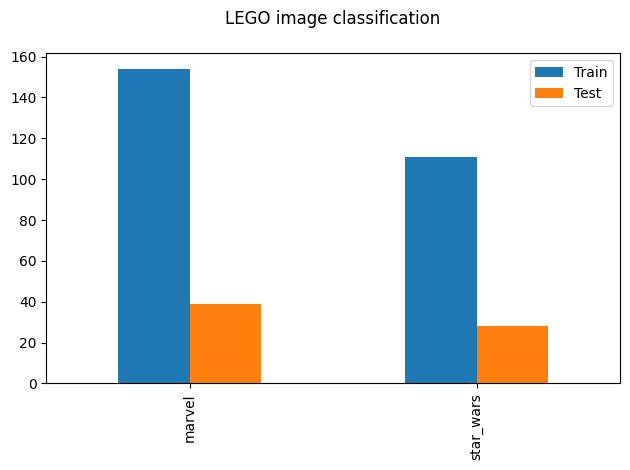

In [ ]:
pd.DataFrame({"Train":train_image_label_info,"Test":test_image_label_info},index=class_name).plot.bar()
plt.title("LEGO image classification\n")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
x=pd.DataFrame({"Train":train_image_label_info,"Test":test_image_label_info},index=class_name)
print(x)

           Train  Test
marvel       154    39
star_wars    111    28


В датафрейме выше наглядно видно соотношение тестовой и обучающей выборки. Также можно заметить, что классы имеют незначительное отклонение баланса, но это не сильно влияет на выборку

In [ ]:
y=(x["Train"][0],x["Train"][1],x["Test"][0],x["Test"][1])
myexplode = [0.2, 0,0.2,0.3]

In [ ]:
my_label=["marvel image_Train ","star_wars image_Train","marvel image_Test","star_wars image_Test"]
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D']

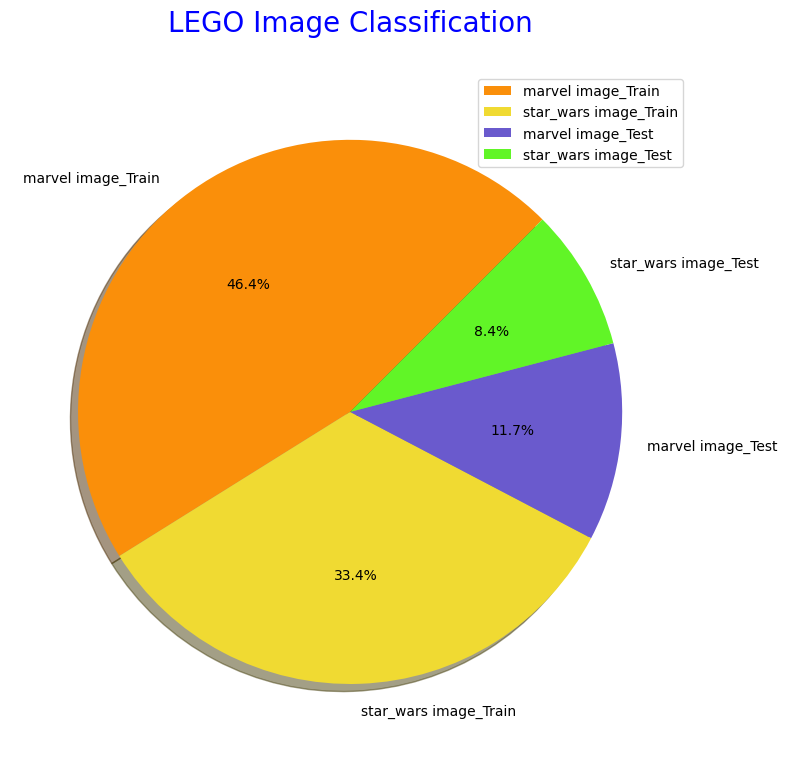

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(y, labels =my_label, shadow = True,colors=color,autopct='%1.1f%%',startangle=45,counterclock=True)
plt.title("LEGO Image Classification\n",color="Blue",fontsize=20)
plt.tight_layout()
plt.legend(loc="best")
plt.show()

### Числовые параметры выборок

Количество уникальных элементов

In [ ]:
len(np.unique(X_train[0]))

256

In [ ]:
len(np.unique(X_test[0]))

242

In [ ]:
train_image=X_train/255.0
len(np.unique(train_image[0]))

256

In [ ]:
test_image=X_test/255.0
len(np.unique(test_image[0]))

242

#### Визуализация случайных изображений

In [ ]:
import random
import matplotlib.pyplot as plt

def RandomImage_visualization(class_names, imagedata_path, imagedata_label):
    # Создание новой фигуры для визуализации изображений
    fig = plt.figure(figsize=(10, 10))
    # Заголовок для фигуры
    fig.suptitle("Визуализация изображений\n", color="blue", fontsize=20)

    # Выбор 9 случайных индексов изображений
    random_indices = random.sample(range(len(imagedata_path)), 9)

    # Отображение 9 случайных изображений на фигуре
    for i, idx in enumerate(random_indices):
        plt.subplot(3, 3, i + 1)
        # Установка пустых меток на осях координат
        plt.xticks([])
        plt.yticks([])
        # Установка плотного расположения изображений
        plt.tight_layout()
        # Отображение текущего изображения
        plt.imshow(imagedata_path[idx], cmap=plt.cm.BrBG)
        # Установка метки с названием соответствующего класса для текущего изображения
        plt.xlabel("Имя класса: {}".format(class_names[int(imagedata_label[idx])]))

    # Отображение фигуры с изображениями
    plt.show()


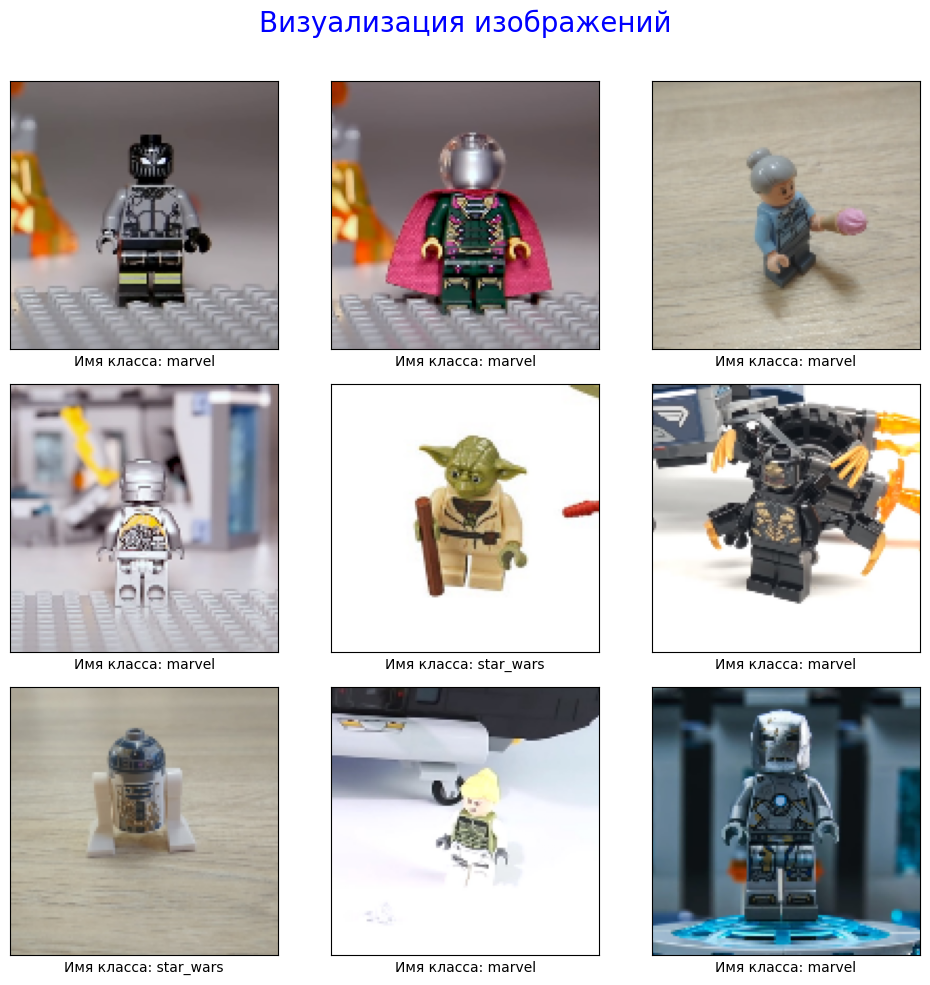

In [ ]:
RandomImage_visualization(class_name,train_image,Y_train)

# Классическое машинное обучение

In [ ]:
re_X_train = []
for img in X_train:
    re_X_train.append(img.reshape(-1))
re_X_train = np.asarray(re_X_train)

In [ ]:
re_X_test = []
for img in X_test:
    re_X_test.append(img.reshape(-1))
re_X_test = np.asarray(re_X_test)

In [ ]:
re_X_train.shape

(265, 49152)

Формируем пустую сводную таблицу, чтобы потом заполнить ее значениями

In [ ]:
scores = pd.DataFrame(
    columns=['accuracy', 'precision', 'recall', 'f1_score', 'duration'],
    index=[
        'KNeighborsClassifier',
        'RandomForest',
        'GaussianNB'
    ]
)

Функция для получения метрик качества моделей

In [ ]:
from sklearn import metrics

def get_metrics(y_test, y_pred):
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    return pd.Series(
        (accuracy_score, precision_score, recall_score, f1_score),
        index=['accuracy', 'precision', 'recall', 'f1_score']
    )

Accuracy (точность) - это метрика, которая показывает, как много примеров из тестовой выборки были предсказаны верно. Accuracy определяется как отношение числа правильно классифицированных примеров к общему числу примеров.

$$Accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$

Precision - это метрика качества модели, которая показывает, как часто модель правильно классифицирует положительные примеры. Она определяется как отношение числа верно классифицированных положительных примеров к числу всех примеров, классифицированных как положительные.

$$Precision=\frac{TP}{TP+FP}$$

Recall (полнота) - это метрика, которая оценивает способность модели находить все положительные образцы в наборе данных. Она измеряет, как много релевантных образцов было найдено моделью из общего числа релевантных образцов в наборе данных.

$$Recall=\frac{TP}{TP+FN}$$

F1 score — это среднее гармоническое precision и recall. Это метрика, которая показывает баланс между precision и recall и является хорошим индикатором для оценки качества модели.

F1 score дает более точную информацию о качестве модели, чем accuracy, если в данных присутствует дисбаланс классов. Если, например, один класс присутствует в данных гораздо чаще, чем другой класс, то accuracy может быть высокой, даже если модель классифицирует хуже для редкого класса. В такой ситуации более информативными могут быть precision, recall и F1 score.

F1 score принимает значения в диапазоне от 0 до 1, где 1 — это идеальное значение, которое означает, что модель работает наилучшим образом, а 0 — это худшее значение, которое означает, что модель не предсказывает ни один из классов.

$$F1 score = \frac{2*Precision*Recall}{Precision+Recall}$$

Функция обучения и записи времени процесса обучения модели в секундах

In [ ]:
import time
from sklearn import metrics
from sklearn.model_selection import learning_curve

def model_and_metrics(model):

    # начало обучения модели
    start = time.time()
    model.fit(re_X_train, Y_train)
    Y_pred = model.predict(re_X_test)
    # конец обучения модели
    end = time.time()

    # График обучения
    train_sizes, train_scores, valid_scores = learning_curve(model, re_X_train, Y_train, cv=5, scoring='accuracy')
    train_scores_mean = -np.mean(train_scores, axis=1)
    valid_scores_mean = -np.mean(valid_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training')
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='g', label='Validation')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

    duration = pd.Series([end - start])
    returned = pd.concat([get_metrics(Y_test, Y_pred), duration])
    return returned

### #1 Classic model (KNeighborsClassifier)

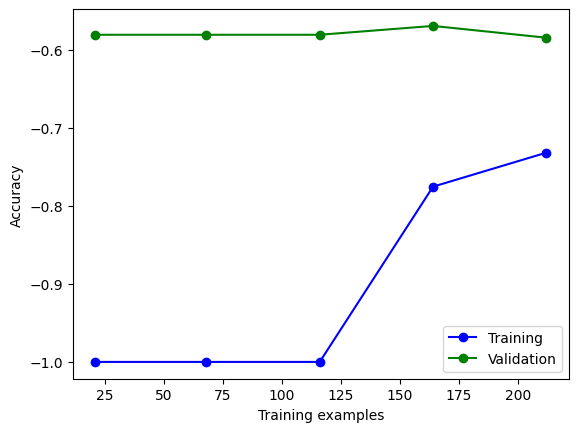

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

scores.iloc[0] = model_and_metrics(KNeighborsClassifier())

### #2 Classic model (RandomForest)

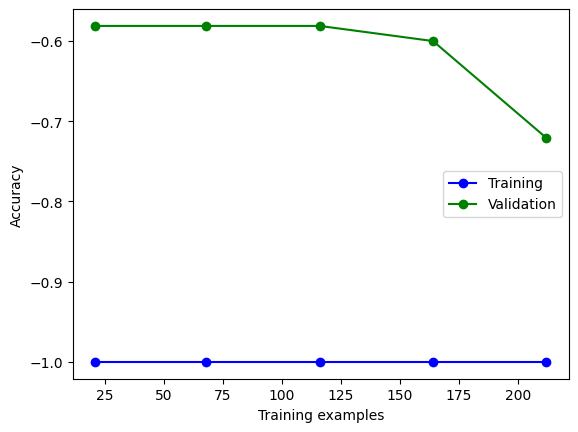

In [ ]:
from sklearn.ensemble import RandomForestClassifier

scores.iloc[1] = model_and_metrics(RandomForestClassifier())

### #3 Classic model (GaussianNB)

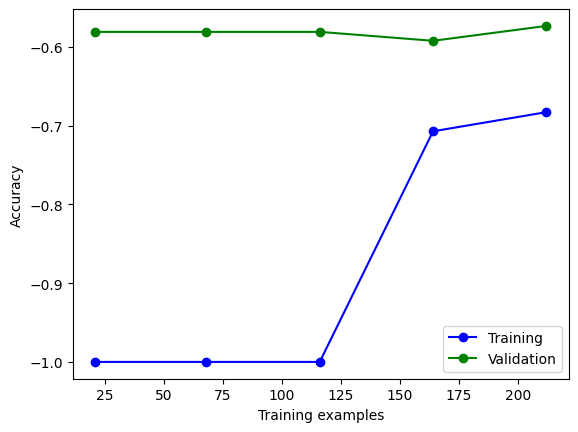

In [ ]:
from sklearn.naive_bayes import GaussianNB

scores.iloc[2] = model_and_metrics(GaussianNB())

### Анализ процесса обучения

Смотрим резултаты сводной таблицы и сравниваем модели по метрикам качества

In [ ]:
scores

,accuracy,precision,recall,f1_score,duration
KNeighborsClassifier,0.552239,0.478261,0.785714,0.594595,0.673246
RandomForest,0.761194,0.730769,0.678571,0.703704,2.197013
GaussianNB,0.671642,0.6,0.642857,0.62069,0.119248


## Нейронные сети

Для примера модели классификации мы будем использовать наиболее распространенную модель Сверточной нейронной сети. В нее можно включить большое число слоев, но чаще всего строится 3 слоя, так мы и поступим

CNN (Convolutional Neural Network) - это класс нейронных сетей, разработанных для обработки данных с несколькими измерениями, такими как изображения.

Основной идеей CNN является использование свертки (convolution) в качестве основного оператора для извлечения признаков из входных данных. Этот процесс сравнивает небольшие участки входных данных с фильтрами (kernels) свертки, чтобы создать карту признаков (feature map). Затем, используя операцию субдискретизации (subsampling) или пулинга (pooling), размерность карты признаков уменьшается, сохраняя при этом наиболее важные признаки.

CNN обычно состоит из трех типов слоев: сверточные (convolutional), слои субдискретизации (subsampling) или пулинга (pooling), а также полносвязные (fully-connected) слои. Сверточные слои извлекают признаки из входных данных, слои субдискретизации снижают размерность карты признаков, а полносвязные слои преобразуют карту признаков в выходные данные.

CNN успешно используется для классификации изображений, распознавания образов, распознавания речи, обработки естественного языка и других задач машинного обучения.

Create Custom CNN Model

In [ ]:
#Функция обучения модели
def model_train(model, optimizer, criterion, train_loader, test_loader, n_epochs, epoch_step):
    tr_loss, vl_loss = [], []

    for epoch in range(n_epochs):
        y_pred = torch.empty(0)
        y_true = torch.empty(0, dtype=torch.long)
        model.train()

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            with torch.no_grad():
                y_true = torch.cat((y_true, y_batch))
                y_pred = torch.cat((y_pred, predictions))

        with torch.no_grad():
            train_acc = accuracy_score(y_true, y_pred.argmax(dim=1)).item()
            train_loss = criterion(y_pred, y_true).item()

        model.eval()
        with torch.no_grad():
            y_pred = torch.empty(0)
            y_true = torch.empty(0, dtype=torch.long)
            for X_batch, y_batch in test_loader:
                predictions = model(X_batch)
                y_true = torch.cat((y_true, y_batch))
                y_pred = torch.cat((y_pred, predictions))
            val_acc = accuracy_score(y_true, y_pred.argmax(dim=1)).item()
            val_loss = criterion(y_pred, y_true).item()

#Вывод промежуточных результатов обучения
            if epoch % epoch_step == 0:
                print(f'#{epoch} Training loss: {train_loss:.4f} training_acc:\
 {train_acc:.4f} val_loss: {val_loss:.4f} val_acc: {val_acc:.4f}')
        tr_loss.append(train_loss)
        vl_loss.append(val_loss)
    return y_true, y_pred.argmax(dim=1), tr_loss, vl_loss

In [ ]:
#количество классов для классификации
n_classes = len(label_name)

In [ ]:
#Преобразование данных
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X.reshape(X.shape[0], 1, *X.shape[1:]))
        self.y = torch.LongTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
import torch
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X.transpose((0, 3, 1, 2)))

        # self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = self.X[idx]
        # Проверяем размерность входных данных
        if x.dim() < 3:
            x = x.unsqueeze(0)  # Добавляем размерность каналов
        return x, self.y[idx]


In [ ]:
trainset = MyDataset(X_train, Y_train)
testset = MyDataset(X_test, Y_test)

In [ ]:
train_loader = DataLoader(trainset, batch_size=32)
test_loader = DataLoader(testset, batch_size=32)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=4,kernel_size=3,padding=1,),
            nn.BatchNorm2d(4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4,stride=8,),
        )
        self.fc1 = nn.Sequential(
            nn.Dropout(),
            nn.Linear(in_features=4*16*16, out_features=n_classes),
            nn.LogSoftmax(dim=1),
        )


    def forward(self, x):
        x = self.conv1(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

In [ ]:
#Задание первоначальных данных для обучения модели
model = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
#Обучение модели
y_true, y_pred, tr_l, vl_l = model_train(model, optimizer, criterion, train_loader, test_loader, n_epochs=40, epoch_step=10)

#0 Training loss: 2.0165 training_acc: 0.4981 val_loss: 1.2698 val_acc: 0.5821
#10 Training loss: 0.6303 training_acc: 0.6377 val_loss: 0.6045 val_acc: 0.6866
#20 Training loss: 0.5017 training_acc: 0.7434 val_loss: 0.6100 val_acc: 0.6418
#30 Training loss: 0.5141 training_acc: 0.7547 val_loss: 0.5795 val_acc: 0.7463


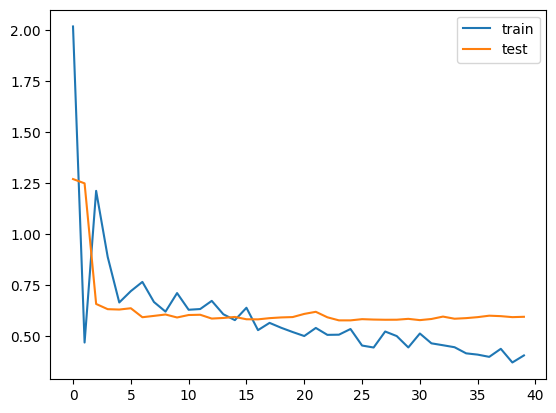

In [ ]:
#вывод результатов работы
plt.plot(tr_l, label="train");
plt.plot(vl_l, label="test");
plt.legend();

In [ ]:
#метрики
print(f"accuracy:", accuracy_score(y_true, y_pred))
print(f"precision:", precision_score(y_true, y_pred, average="weighted", zero_division=0))
print(f"recall:", recall_score(y_true, y_pred, average="weighted"))
print(f"f1_score:", f1_score(y_true, y_pred, average="weighted"))
confusion_matrix(y_true, y_pred)

accuracy: 0.7313432835820896
precision: 0.7466677308643946
recall: 0.7313432835820896
f1_score: 0.7331487722676938


array([[27, 12],
       [ 6, 22]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        39
           1       0.65      0.79      0.71        28

    accuracy                           0.73        67
   macro avg       0.73      0.74      0.73        67
weighted avg       0.75      0.73      0.73        67



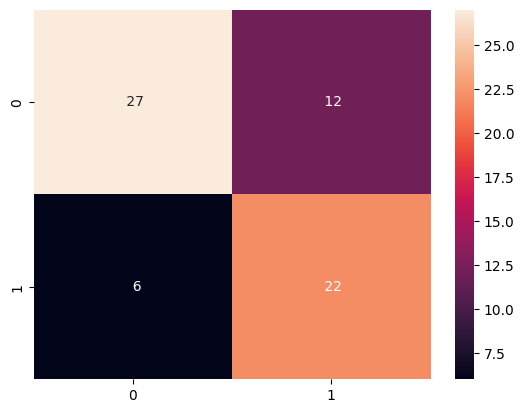

In [ ]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="3d");